In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# print(exchange_rates.head(5))
# print(exchange_rates.tail(5))
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
# df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)


In [4]:
exchange_rates.columns =['Time', 'Australian_dollar', 'Bulgarian_lev',
       'Brazilian_real', 'Canadian_dollar', 'Swiss_franc',
       'Chinese_yuan_renminbi', 'Cypriot_pound', 'Czech_koruna',
       'Danish_krone', 'Estonian_kroon', 'UK_pound_sterling',
       'Greek_drachma', 'Hong_Kong_dollar', 'Croatian_kuna',
       'Hungarian_forint', 'Indonesian_rupiah', 'Israeli_shekel',
       'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats',
       'Maltese_lira', 'Mexican_peso', 'Malaysian_ringgit',
       'Norwegian_krone', 'New_Zealand_dollar', 'Philippine_peso',
       'Polish_zloty', 'Romanian_leu', 'Russian_rouble',
       'Swedish_krona', 'Singapore_dollar', 'Slovenian_tolar',
       'Slovak_koruna', 'Thai_baht', 'Turkish_lira', 'US_dollar',
       'South_African_rand']
exchange_rates.columns

Index(['Time', 'Australian_dollar', 'Bulgarian_lev', 'Brazilian_real',
       'Canadian_dollar', 'Swiss_franc', 'Chinese_yuan_renminbi',
       'Cypriot_pound', 'Czech_koruna', 'Danish_krone', 'Estonian_kroon',
       'UK_pound_sterling', 'Greek_drachma', 'Hong_Kong_dollar',
       'Croatian_kuna', 'Hungarian_forint', 'Indonesian_rupiah',
       'Israeli_shekel', 'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats', 'Maltese_lira',
       'Mexican_peso', 'Malaysian_ringgit', 'Norwegian_krone',
       'New_Zealand_dollar', 'Philippine_peso', 'Polish_zloty', 'Romanian_leu',
       'Russian_rouble', 'Swedish_krona', 'Singapore_dollar',
       'Slovenian_tolar', 'Slovak_koruna', 'Thai_baht', 'Turkish_lira',
       'US_dollar', 'South_African_rand'],
      dtype='object')

In [5]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.2952     1
1.2502     1
1.0841     1
1.2775     1
1.2778     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [11]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

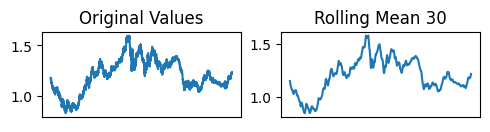

In [12]:
%matplotlib inline

plt.figure(figsize=(18,12))
plt.subplot(9,6,1)
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.xticks([])
plt.title('Original Values')
plt.subplot(9,6,2)
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.xticks([])
plt.title('Rolling Mean 30')
plt.show()

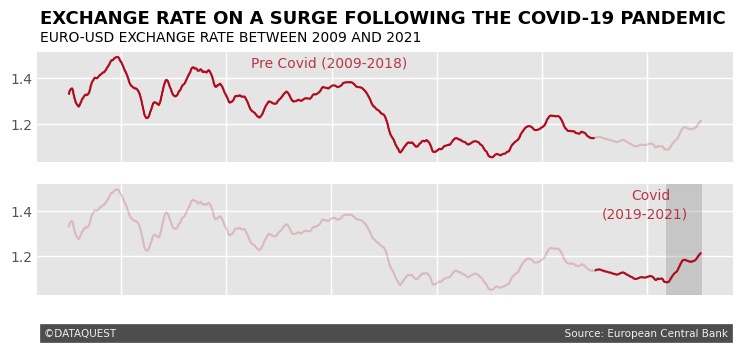

In [187]:
valid_years = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2009]

pre_covid = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2009) &
                                (euro_to_dollar['Time'].dt.year <= 2018)]


covid = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2019]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,3))


axes = [ax1, ax2]
for axis in axes:
    style.use('ggplot')
    axis.plot(valid_years['Time'], valid_years['rolling_mean'], color='#af0b1e', alpha= 0.2, linewidth=1.5)
#     axis.set_yticks([])
    axis.set_xticklabels(['', '', '', '', '', ''])
#     axis.set_yticks([])
    for location in ['left', 'top', 'right', 'bottom']:
        axis.spines[location].set_visible(False)

# individually highlighting pre-covid and covid times
ax1.plot(pre_covid['Time'], pre_covid['rolling_mean'], color='#af0b1e', linewidth=1.5)
ax2.plot(covid['Time'], covid['rolling_mean'],color='#af0b1e', linewidth=1.5)

# Adding plot labels
ax1.text(734672.0, 1.45, 'Pre Covid (2009-2018)', alpha=0.8, color='#af0b1e')
ax2.text(737312.0, 1.45, 'Covid', alpha=0.8, color='#af0b1e')
ax2.text(737111.0, 1.37, '(2019-2021)', alpha=0.8, color='#af0b1e')

# Adding a title and subtitle
ax1.text(733208.0, 1.64, 'EXCHANGE RATE ON A SURGE FOLLOWING THE COVID-19 PANDEMIC', 
         weight='bold', size=13)
ax1.text(733208.0, 1.56, 'EURO-USD EXCHANGE RATE BETWEEN 2009 AND 2021', size=10)

# Adding a reference bar with dataquest signature
ax2.text(733238.0, 0.85, '©DATAQUEST' + ' '*138 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=7.5)

# Highlighting the surge
ax2.axvspan(xmin=737555.0, xmax=737800.0, ymin=0.01, alpha=0.3, color='grey')


plt.show()